In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

**Inputs**

In [2]:
# Parameters
starting_point = 5  # Starting point for descent
learning_rate = 0.1

**Helper** **Functions**

In [3]:
# Quadratic cost function
def cost_function(x):
    return x**2 + 10*np.sin(x)

# Derivative of the cost function (gradient)
def gradient(x):
    return 2*x + 10*np.cos(x)

# Adaptive Gradient Descent -inspired by Brachistochrone curve
def adaptive_gradient_descent(starting_point, learning_rate=0.1, max_iterations=1000, tolerance=1e-6):

    x = starting_point
    # To store path of descent
    path = [x]
    prev_step_size = 1
    iteration = 0

    while prev_step_size > tolerance and iteration < max_iterations:
        grad = gradient(x)

        # Adaptive learning rate based on the gradient's magnitude
        adaptive_rate = learning_rate / (1 + np.abs(grad))  # Decrease rate with larger gradients

        new_x = x - adaptive_rate * grad  # Update rule

        prev_step_size = np.abs(new_x - x)  # Calculate step size
        x = new_x
        path.append(x)
        iteration += 1

    return x, path

In [4]:

# Execute adaptive gradient descent
min_x, path = adaptive_gradient_descent(starting_point, learning_rate)

# Results
print(f"Found minimum at: x = {min_x:.4f}")

Found minimum at: x = 3.8375


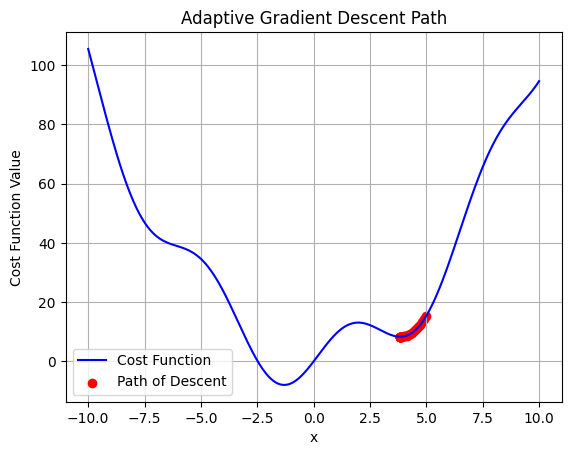

In [5]:
# Plot the cost function and path of descent
x_vals = np.linspace(-10, 10, 400)
y_vals = cost_function(x_vals)

plt.plot(x_vals, y_vals, label='Cost Function', color='blue')
plt.scatter(path, cost_function(np.array(path)), color='red', label='Path of Descent')
plt.title('Adaptive Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('Cost Function Value')
plt.legend()
plt.grid(True)
plt.show()